In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()
print(path)

/Users/makkimaki/PycharmProjects/python_programming/SchrodingerSolver_HarmonicLikePotential1D


In [3]:
filename = "SymmetricPotentialEnergy.csv"
df = pd.read_csv(filename, header=4)

In [4]:
df.head()

,% dist,r,"Electric potential (V), Point: (0, 0)"
0,0.14,0.00,0.139774
1,0.14,0.02,0.139782
2,0.14,0.04,0.139795
3,0.14,0.06,0.139814
4,0.14,0.08,0.139829


In [5]:
df = df.rename(columns={"% dist" : 'z', 'Electric potential (V), Point: (0, 0)':'potential'})
df.head()

,z,r,potential
0,0.14,0.00,0.139774
1,0.14,0.02,0.139782
2,0.14,0.04,0.139795
3,0.14,0.06,0.139814
4,0.14,0.08,0.139829


In [17]:
z = df["z"]
r = df["r"]
potential = df["potential"] 
print("length of r:", r.shape)
print("length of z:", z.shape)
print("shape of potential:", potential.shape)

length of r: (8446,)
length of z: (8446,)
shape of potential: (8446,)


In [22]:
df_pivot = pd.pivot_table(data=df, index="z", columns="r", values="potential")
print("df_pivot shape:", df_pivot.shape,  "\n")
print("Table data: \n ", df_pivot)

df_pivot shape: (41, 205) 

Table data: 
  r         -2.04     -2.02     -2.00     -1.98     -1.96     -1.94     -1.92  \
z                                                                             
0.140  0.142394  0.142170  0.141959  0.141798  0.141713  0.141709  0.141786   
0.142  0.142428  0.142217  0.142021  0.141870  0.141789  0.141782  0.141856   
0.144  0.142460  0.142263  0.142075  0.141935  0.141860  0.141856  0.141922   
0.146  0.142489  0.142305  0.142129  0.141998  0.141927  0.141922  0.141983   
0.148  0.142518  0.142344  0.142179  0.142056  0.141988  0.141985  0.142043   
0.150  0.142545  0.142380  0.142227  0.142113  0.142048  0.142046  0.142099   
0.152  0.142572  0.142416  0.142273  0.142165  0.142104  0.142100  0.142152   
0.154  0.142599  0.142452  0.142315  0.142212  0.142158  0.142153  0.142201   
0.156  0.142621  0.142485  0.142356  0.142260  0.142208  0.142203  0.142246   
0.158  0.142647  0.142514  0.142394  0.142304  0.142253  0.142250  0.142292   
0.160  0.

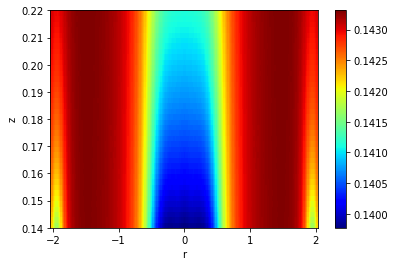

In [23]:
plt.pcolor(df_pivot.columns, df_pivot.index, df_pivot, cmap="jet")
plt.colorbar()
# plt.axis("tight")
plt.xlabel("r")
plt.ylabel("z")
plt.show()

In [24]:
rmin = np.min(r)
rmax = np.max(r)
print("rmin=",rmin, " ","rmax=",rmax)
zmin = np.min(z)
zmax = np.max(z)
print("zmin=",zmin, " ","zmax=",zmax)

rmin= -2.04   rmax= 2.04
zmin= 0.14   zmax= 0.22


In [25]:
mesh_number = 1000
N_r = len(r)
N_z = len(z)
print("N_r:", N_r)
print("N_z:", N_z)
x = np.linspace(rmin, rmax, num=mesh_number)
y = np.linspace(zmin, zmax, num=mesh_number)
xx, yy = np.meshgrid(x, y)

N_r: 8446
N_z: 8446


In [26]:
import scipy.interpolate as interp

In [28]:
fun = interp.interp2d(df_pivot.columns, df_pivot.index, df_pivot -0.1434 , kind="cubic")
# fun(1,3)[0]
funs = fun(x, y)

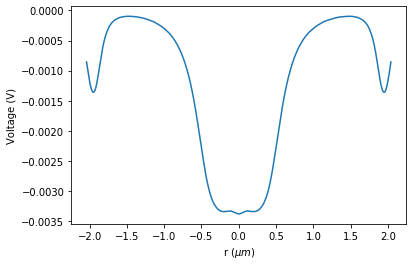

In [29]:
plt.plot(x, fun(x, 0.15))
plt.xlabel("r ($\mu m$)")
plt.ylabel("Voltage (V)")
plt.show()

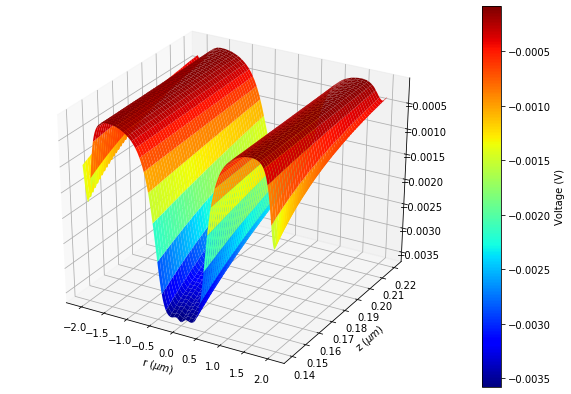

In [30]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

z_label = r"Voltage (V)"

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx, yy, funs, cmap='jet', linewidth=0) 
fig.colorbar(surf, label=z_label)
plt.xlabel("r ($\mu m$)")
plt.ylabel("z ($\mu m$)")
# ax.set_zlabel("Voltage (V)")


plt.show()

[-3331.51487052-13.76846502j -3331.51487052+13.76846502j
 -3328.05786645-26.19540972j -3328.05786645+26.19540972j
 -3323.453599  -37.00390895j -3323.453599  +37.00390895j
 -3318.62351532-46.79528708j -3318.62351532+46.79528708j
 -3313.67854743-56.09879327j -3313.67854743+56.09879327j
 -3308.15072029-64.85086133j -3308.15072029+64.85086133j
 -3302.14798916-72.22338111j -3302.14798916+72.22338111j
 -3297.70834476-79.24305854j -3297.70834476+79.24305854j
 -3292.27043869-87.82750667j -3292.27043869+87.82750667j
 -3284.08065777-96.37986672j -3284.08065777+96.37986672j]


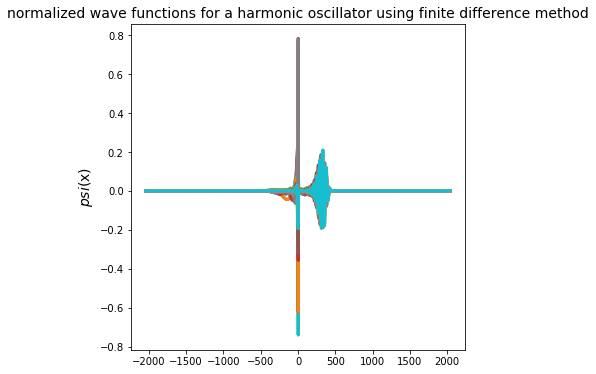

In [31]:
#Physical quantity and parameter
shift = 3000
A = 20
k = 0.006951
a0 = 3.8066*2 # nm
re = 50/(A*a0/2)
h = 141/(A*a0/2)
hbarhbardevidedby2m = 9212.5 # GHz/nm^2

rmin = 0
zmin = 0
rmax = 2040/(A*a0/2)
zmax = zmin + 190/(A*a0/2) - h
x = np.linspace(-rmax, rmax, 1000) # unitless

# Define step size along coordinate
h = x[1] - x[0]
StateNumber = 20
N = mesh_number


# Create kinetic energy matrix
T = np.zeros((N-2)**2).reshape(N-2, N-2)
for i in range(N-2):
    for j in range(N-2):
        if i == j:
            T[i, j] = -2 
        elif i-j == 1:
            T[i, j] = 1 - 1/x[i] * h/2
        elif i-j == -1:
            T[i, j] == 1 + 1/x[i] * h/2
        else:
            T[i, j] = 0

# Create potential energy energy matrix
V = np.zeros((N-2)**2).reshape(N-2, N-2)
for i in range(N-2):
    for j in range(N-2):
        if i == j:
            V[i, j] = 1000 * 241.8 * (A*a0/2)**2 * fun((A*a0/2)*x[i+1]/1000, 0.15) / hbarhbardevidedby2m
        else:
            V[i, j] = 0

# Create Hamiltonian matrix
H = -T/(2*h**2) + V + shift

# Find eigenvalues and eigenvectors, then sort them in ascending order
val, vec = np.linalg.eig(H)
z = np.argsort(val - shift)
z = z[0 : StateNumber]
# energies = ((val[z] - shift) / (val[z][0] - shift))
energies = val[z] - shift
print(energies)


plt.figure(figsize=(6, 6))
for i in range(len(z)):
    y = []
    y = np.append(y, vec[:, z[i]])
    y = np.append(y, 0)
    y = np.insert(y, 0, 0)
    plt.plot(x*(A*a0/2), y, lw=3, label="{}".format(i))
    plt.ylabel("$psi$(x)", size = 14)

plt.title("normalized wave functions for a harmonic oscillator using finite difference method", size =14)
plt.show()

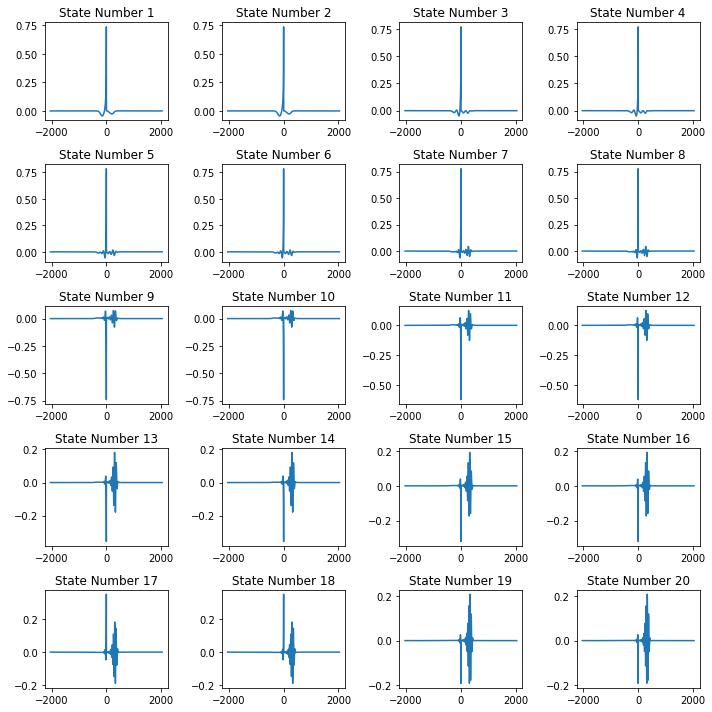

In [32]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, StateNumber):
    plt.subplot(5,4, i+1)
    plt.title("State Number %d" % (i+1))
    y = []
    y = np.append(y, vec[:, z[i]])
    y = np.append(y, 0)
    y = np.insert(y, 0, 0)
    plt.plot(x*(A*a0/2), y, lw=1.5, label="{}".format(i))
#     plt.ylabel("$psi$(x)", size = 14)
plt.tight_layout()
plt.show()